In [1]:
import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data For Training CNN Model

In [3]:
df_merge = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/merged_dataset_Project2.csv')
df_merge

<ipython-input-3-8f5224175a4d>:1: DtypeWarning: Columns (0,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merge = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/merged_dataset_Project2.csv')


,query_type,text,created_time,source,sentiment,restaurant,cleaned
0,post,Keep the party going! 🎉 Final week to get your...,2023-04-29 12:21:49+00:00,facebook,NaN,NaN,"['keep', 'party', 'going', '🎉', 'final', 'week..."
1,comment,The amount of chillis given by pizzahut for 2 ...,2023-04-29 13:26:05+00:00,facebook,NaN,NaN,"['amount', 'chilli', 'given', 'pizzahut', 'reg..."
2,comment,Cutie piessss ❤️,2023-04-29 14:28:13+00:00,facebook,NaN,NaN,"['cutie', 'pie', '❤️']"
3,comment,so comel la these 2 kids 🥰,2023-04-29 12:55:17+00:00,facebook,NaN,NaN,"['comel', 'la', 'kid', '🥰']"
4,comment,Can McDonald pls take action on this Google Re...,2023-04-30 06:36:10+00:00,facebook,NaN,NaN,"['mcdonald', 'pls', 'take', 'action', 'google'..."
...,...,...,...,...,...,...,...
293156,NaN,aku bg 4 out of 5. ape2 pun citer yang berbalo...,NaN,Dr Dataset,NaN,NaN,"['aku', 'bg', 'ape', 'pun', 'citer', 'berbaloi..."
293157,NaN,baru jer balik dari nonton mobie nie....rating...,NaN,Dr Dataset,NaN,NaN,"['jer', 'balik', 'nonton', 'mobie', 'nierating..."
293158,NaN,banyak ar scene scene yang lawak ... yang mema...,NaN,Dr Dataset,NaN,NaN,"['ar', 'scene', 'scene', 'lawak', 'memang', 't..."
293159,NaN,highly entertaining.... kena consentrate betul...,NaN,Dr Dataset,NaN,NaN,"['highly', 'entertaining', 'kena', 'consentrat..."


## Mixed language

In [4]:
# Open AI generated labelled data
df_mix_1 = pd.read_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/merged_LabelledData.csv')
df_mix_1

,index,text,sentiment,cleaned
0,0,The amount of chillis given by pizzahut for 2 ...,Neutral,"['amount', 'chilli', 'given', 'pizzahut', 'reg..."
1,1,Cutie piessss ❤️,Positive,"['cutie', 'pie', '❤️']"
2,2,so comel la these 2 kids 🥰,Positive,"['comel', 'la', 'kid', '🥰']"
3,3,Can McDonald pls take action on this Google Re...,Neutral,"['mcdonald', 'pls', 'take', 'action', 'google'..."
4,4,Game baru dari app Touch n Go.. ku dah dapat d...,Positive,"['game', 'app', 'touch', 'go', 'ku', 'dah', 'd..."
...,...,...,...,...
2540,259,complete toys Mcd🤪,Neutral,"['complete', 'toy', 'mcd', '🤪']"
2541,260,Xin Rou Yap,Neutral,"['xin', 'rou', 'yap']"
2542,261,"Td pegi beli drive thru mcd pandan mewah, xdpt...",Negative,"['td', 'pegi', 'beli', 'drive', 'thru', 'mcd',..."
2543,262,X dPat collect,Neutral,"['dpat', 'collect']"


In [5]:
# Open AI generated text
df_mix_2 = df_merge[df_merge["source"]=='openai']
df_mix_2.shape

(100, 7)

In [6]:
df_mix = pd.concat([df_mix_1,df_mix_2])
df_mix.shape # Should be 2545+100 = 2645

(2645, 8)

In [7]:
df_mix

,index,text,sentiment,cleaned,query_type,created_time,source,restaurant
0,0.0,The amount of chillis given by pizzahut for 2 ...,Neutral,"['amount', 'chilli', 'given', 'pizzahut', 'reg...",NaN,NaN,NaN,NaN
1,1.0,Cutie piessss ❤️,Positive,"['cutie', 'pie', '❤️']",NaN,NaN,NaN,NaN
2,2.0,so comel la these 2 kids 🥰,Positive,"['comel', 'la', 'kid', '🥰']",NaN,NaN,NaN,NaN
3,3.0,Can McDonald pls take action on this Google Re...,Neutral,"['mcdonald', 'pls', 'take', 'action', 'google'...",NaN,NaN,NaN,NaN
4,4.0,Game baru dari app Touch n Go.. ku dah dapat d...,Positive,"['game', 'app', 'touch', 'go', 'ku', 'dah', 'd...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
98219,NaN,The customer service at Subway is always top-n...,Positive,"['customer', 'service', 'subway', 'always', 't...",NaN,NaN,openai,NaN
98220,NaN,The portion sizes at Pizza Hut are always so s...,Negative,"['portion', 'size', 'pizza', 'hut', 'always', ...",NaN,NaN,openai,NaN
98221,NaN,I'm always satisfied with the food at Burger K...,Neutral,"['always', 'satisfied', 'food', 'burger', 'kin...",NaN,NaN,openai,NaN
98222,NaN,The cleanliness of the KFC outlet in my neighb...,Negative,"['cleanliness', 'kfc', 'outlet', 'neighbourhoo...",NaN,NaN,openai,NaN


In [8]:
df_mix['sentiment'].value_counts()

Neutral     1608
Negative     654
Positive     383
Name: sentiment, dtype: int64

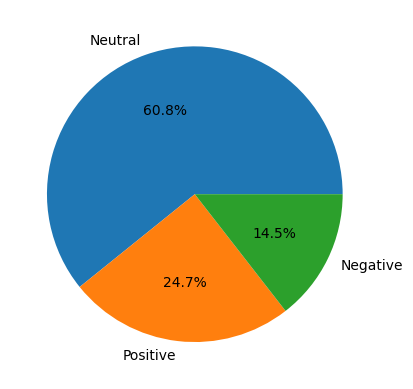

In [9]:
# Percentage of sentiment
plt.pie(df_mix['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%.1f%%')
plt.show()

In [ ]:
df_mix.to_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/Mixed_Labelled_Data.csv', index=False)

## English

In [10]:
df_eng = df_merge[df_merge["source"]=='previous project']

In [11]:
df_eng.shape # Should be (45049, 7)

(45049, 7)

In [12]:
df_eng

,query_type,text,created_time,source,sentiment,restaurant,cleaned
53075,NaN,@TheRealLCB24 You know they’re about to take h...,NaN,previous project,Neutral,NaN,"['know', '’re', 'take', 'burger', 'king', '😒']"
53076,NaN,@TwoMartinisPls I’m sure Burger King was open....,NaN,previous project,Negative,NaN,"['’', 'sure', 'burger', 'king', 'open', 'quick..."
53077,NaN,@stevesilberman As anyone could have correctly...,NaN,previous project,Neutral,NaN,"['anyone', 'could', 'correctly', 'guessed', 's..."
53078,NaN,@ZekeJMiller @Phil_Mattingly Did they take him...,NaN,previous project,Neutral,NaN,"['take', 'burger', 'king', 'mcdonald', '’', 'a..."
53079,NaN,"@AshIsHereForIt ""You want lobster, huh? I'm th...",NaN,previous project,Positive,NaN,"['want', 'lobster', 'huh', 'thinking', 'burger..."
...,...,...,...,...,...,...,...
98119,NaN,@icewaffIe @caffecals im terrified of subway i...,NaN,previous project,Negative,NaN,"['im', 'terrified', 'subway', 'general', 'wrap..."
98120,NaN,@SUBWAY I demand an apology for getting rid of...,NaN,previous project,Negative,NaN,"['demand', 'apology', 'getting', 'rid', 'wrap'..."
98121,NaN,"Pickle barrel isn’t open on mondays, subway do...",NaN,previous project,Negative,NaN,"['pickle', 'barrel', '’', 'open', 'monday', 's..."
98122,NaN,Subway really got rid of their tomato and spin...,NaN,previous project,Positive,NaN,"['subway', 'really', 'got', 'rid', 'tomato', '..."


In [13]:
df_eng['sentiment'].value_counts()

Neutral     18540
Positive    15116
Negative    11393
Name: sentiment, dtype: int64

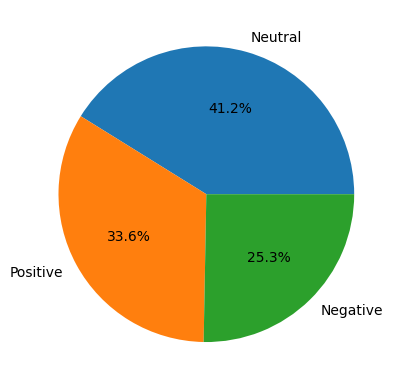

In [14]:
# Percentage of sentiment
plt.pie(df_eng['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%.1f%%')
plt.show()

In [ ]:
df_eng.to_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/English_Labelled_Data.csv', index=False)

## English & Mixed Language

In [15]:
df_eng_mix = pd.concat([df_eng,df_mix])
df_eng_mix.head()

,query_type,text,created_time,source,sentiment,restaurant,cleaned,index
53075,NaN,@TheRealLCB24 You know they’re about to take h...,NaN,previous project,Neutral,NaN,"['know', '’re', 'take', 'burger', 'king', '😒']",NaN
53076,NaN,@TwoMartinisPls I’m sure Burger King was open....,NaN,previous project,Negative,NaN,"['’', 'sure', 'burger', 'king', 'open', 'quick...",NaN
53077,NaN,@stevesilberman As anyone could have correctly...,NaN,previous project,Neutral,NaN,"['anyone', 'could', 'correctly', 'guessed', 's...",NaN
53078,NaN,@ZekeJMiller @Phil_Mattingly Did they take him...,NaN,previous project,Neutral,NaN,"['take', 'burger', 'king', 'mcdonald', '’', 'a...",NaN
53079,NaN,"@AshIsHereForIt ""You want lobster, huh? I'm th...",NaN,previous project,Positive,NaN,"['want', 'lobster', 'huh', 'thinking', 'burger...",NaN


In [16]:
df_eng_mix.shape # Should be

(47694, 8)

In [17]:
df_eng_mix['sentiment'].value_counts()

Neutral     20148
Positive    15499
Negative    12047
Name: sentiment, dtype: int64

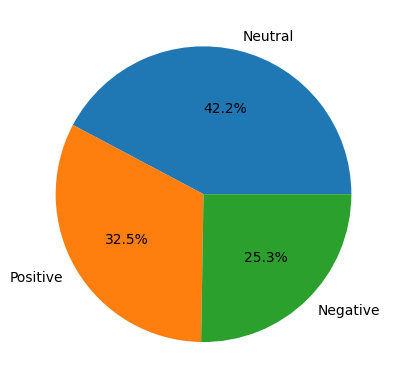

In [18]:
# Percentage of sentiment
plt.pie(df_eng_mix['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%.1f%%')
plt.show()

In [ ]:
df_eng_mix.to_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/English&Mixed_Labelled_Data.csv', index=False)

# Data For Applying CNN Model

In [ ]:
df_facepager_Project2 = df_merge[df_merge["source"]=='facebook Project 2']

In [ ]:
df_facepager_Project2

,query_type,text,created_time,source,sentiment,restaurant,cleaned
98224,post,Our outlet at Petronas Bandar Bukit Tinggi is ...,NaN,facebook Project 2,NaN,A&W,"['outlet', 'petronas', 'bukit', 'temporarily',..."
98225,comment,Renovate pulak… baru nak order waffle 😭,2023-10-01 03:21:35+00:00,facebook Project 2,NaN,A&W,"['renovate', 'pulak', '…', 'nak', 'order', 'wa..."
98226,comment,A&W Kota Kemuning x alert menu yg dipesan...,2023-09-30 11:43:06+00:00,facebook Project 2,NaN,A&W,"['kota', 'kemuning', 'alert', 'menu', 'yg', 'd..."
98227,comment,Erica Biggs come back 1st Nov 🤣,2023-09-30 12:38:26+00:00,facebook Project 2,NaN,A&W,"['erica', 'biggs', 'come', 'back', 'st', '🤣']"
98228,comment,Y now only informed? On Msia day it's already...,2023-10-01 19:23:14+00:00,facebook Project 2,NaN,A&W,"['informed', 'msia', 'day', 'already', 'closed']"
...,...,...,...,...,...,...,...
194372,comment,Ukuran bag?,2023-09-02 06:26:38+00:00,facebook Project 2,NaN,Texas Chicken,"['ukuran', 'bag']"
194373,comment,Shah Nor Yati Yati jom beli,2023-09-02 01:15:18+00:00,facebook Project 2,NaN,Texas Chicken,"['shah', 'yati', 'yati', 'jom', 'beli']"
194374,comment,Macam mana cara nk beli nie..kena beli combo y...,2023-10-26 11:17:10+00:00,facebook Project 2,NaN,Texas Chicken,"['macam', 'cara', 'nk', 'beli', 'niekena', 'be..."
194375,comment,Dah settle kumpul kedua²,2023-10-14 03:46:30+00:00,facebook Project 2,NaN,Texas Chicken,"['dah', 'settle', 'kumpul', 'kedua²']"


In [ ]:
df_facepager_Project2.to_csv('/content/drive/MyDrive/MDS Project LimJiaYee/Code/Dataset/Project2/facebookProject2_cleaned.csv', index=False)